# Analyzing the World Happiness Report

### What makes a country happy and what can we do to improve the happiness?

#### Importing Packages

In [138]:
import pandas as pd
from pandas.plotting import scatter_matrix
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt  # To visualize

%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

#### Importing the Data

In [90]:
df = pd.read_csv("world-happiness-report-2021.csv")
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


<IPython.core.display.Javascript object>

In [91]:
df2 = pd.read_csv("world-happiness-report.csv")
df2.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


<IPython.core.display.Javascript object>

#### Preparing the Data for the Analysis

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
Country name                                  149 non-null object
Regional indicator                            149 non-null object
Ladder score                                  149 non-null float64
Standard error of ladder score                149 non-null float64
upperwhisker                                  149 non-null float64
lowerwhisker                                  149 non-null float64
Logged GDP per capita                         149 non-null float64
Social support                                149 non-null float64
Healthy life expectancy                       149 non-null float64
Freedom to make life choices                  149 non-null float64
Generosity                                    149 non-null float64
Perceptions of corruption                     149 non-null float64
Ladder score in Dystopia                      149 non-null float64
Explained by: Log GDP per 

<IPython.core.display.Javascript object>

In [93]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
Country name                        1949 non-null object
year                                1949 non-null int64
Life Ladder                         1949 non-null float64
Log GDP per capita                  1913 non-null float64
Social support                      1936 non-null float64
Healthy life expectancy at birth    1894 non-null float64
Freedom to make life choices        1917 non-null float64
Generosity                          1860 non-null float64
Perceptions of corruption           1839 non-null float64
Positive affect                     1927 non-null float64
Negative affect                     1933 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


<IPython.core.display.Javascript object>

In [94]:
df.columns = df.columns.str.replace(
    " ", ""
)  # we need to get rid of the whitespace in columnnames

<IPython.core.display.Javascript object>

In [95]:
df2.columns = df2.columns.str.replace(
    " ", ""
)  # we need to get rid of the whitespace in columnnames

<IPython.core.display.Javascript object>

In [96]:
df.columns

Index(['Countryname', 'Regionalindicator', 'Ladderscore',
       'Standarderrorofladderscore', 'upperwhisker', 'lowerwhisker',
       'LoggedGDPpercapita', 'Socialsupport', 'Healthylifeexpectancy',
       'Freedomtomakelifechoices', 'Generosity', 'Perceptionsofcorruption',
       'LadderscoreinDystopia', 'Explainedby:LogGDPpercapita',
       'Explainedby:Socialsupport', 'Explainedby:Healthylifeexpectancy',
       'Explainedby:Freedomtomakelifechoices', 'Explainedby:Generosity',
       'Explainedby:Perceptionsofcorruption', 'Dystopia+residual'],
      dtype='object')

<IPython.core.display.Javascript object>

In [98]:
df2.columns

Index(['Countryname', 'year', 'LifeLadder', 'LogGDPpercapita', 'Socialsupport',
       'Healthylifeexpectancyatbirth', 'Freedomtomakelifechoices',
       'Generosity', 'Perceptionsofcorruption', 'Positiveaffect',
       'Negativeaffect'],
      dtype='object')

<IPython.core.display.Javascript object>

In [99]:
# We want to combine the data, so we will only select the columns, that are present in both datasets
df_stripped = df[
    [
        "Countryname",
        "Ladderscore",
        "LoggedGDPpercapita",
        "Socialsupport",
        "Healthylifeexpectancy",
        "Freedomtomakelifechoices",
        "Generosity",
        "Perceptionsofcorruption",
    ]
]

<IPython.core.display.Javascript object>

In [100]:
df_stripped[
    "year"
] = 2021  # the data for 2021 doesn't have a year column, so we create it here

/Users/baumannm/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>

In [101]:
df_stripped2 = df2[
    [
        "Countryname",
        "LifeLadder",
        "LogGDPpercapita",
        "Socialsupport",
        "Healthylifeexpectancyatbirth",
        "Freedomtomakelifechoices",
        "Generosity",
        "Perceptionsofcorruption",
        "year",
    ]
]

<IPython.core.display.Javascript object>

In [102]:
df_stripped2.columns = (
    df_stripped.columns
)  # to combine the data it needs to have the same column names

<IPython.core.display.Javascript object>

In [103]:
df_stripped2

,Countryname,Ladderscore,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,year
0,Afghanistan,3.724,7.370,0.451,50.80,0.718,0.168,0.882,2008
1,Afghanistan,4.402,7.540,0.552,51.20,0.679,0.190,0.850,2009
2,Afghanistan,4.758,7.647,0.539,51.60,0.600,0.121,0.707,2010
3,Afghanistan,3.832,7.620,0.521,51.92,0.496,0.162,0.731,2011
4,Afghanistan,3.783,7.705,0.521,52.24,0.531,0.236,0.776,2012
...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,2016
1945,Zimbabwe,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,2017
1946,Zimbabwe,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,2018
1947,Zimbabwe,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,2019


<IPython.core.display.Javascript object>

In [104]:
df_all = pd.concat([df_stripped, df_stripped2])  # here we can combine the data

<IPython.core.display.Javascript object>

In [105]:
# the Regional Indicator is a interesting column for us, that is only present in the 2021-data. But we can simply merge it to the new dataframe
df_all = pd.merge(df_all, df[["Countryname", "Regionalindicator"]], how="left")

<IPython.core.display.Javascript object>

In [106]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2098 entries, 0 to 2097
Data columns (total 10 columns):
Countryname                 2098 non-null object
Ladderscore                 2098 non-null float64
LoggedGDPpercapita          2062 non-null float64
Socialsupport               2085 non-null float64
Healthylifeexpectancy       2043 non-null float64
Freedomtomakelifechoices    2066 non-null float64
Generosity                  2009 non-null float64
Perceptionsofcorruption     1988 non-null float64
year                        2098 non-null int64
Regionalindicator           2035 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 180.3+ KB


<IPython.core.display.Javascript object>

In [107]:
df_all.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1816 entries, 0 to 2097
Data columns (total 10 columns):
Countryname                 1816 non-null object
Ladderscore                 1816 non-null float64
LoggedGDPpercapita          1816 non-null float64
Socialsupport               1816 non-null float64
Healthylifeexpectancy       1816 non-null float64
Freedomtomakelifechoices    1816 non-null float64
Generosity                  1816 non-null float64
Perceptionsofcorruption     1816 non-null float64
year                        1816 non-null int64
Regionalindicator           1816 non-null object
dtypes: float64(7), int64(1), object(2)
memory usage: 156.1+ KB


<IPython.core.display.Javascript object>

In [108]:
# We need to do something about NAs. Since we are only losing about 10% of the data, if we are getting rid of all NAs
# that seems to be a better alternative than putting in the mean or handle it in a different way.
df_all_dropped = df_all.dropna()

<IPython.core.display.Javascript object>

#### Now lets take a closer look at the Data

In [109]:
df_all_dropped

,Countryname,Ladderscore,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,year,Regionalindicator
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021,Western Europe
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021,Western Europe
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021,Western Europe
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021,Western Europe
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021,Western Europe
...,...,...,...,...,...,...,...,...,...,...
2093,Zimbabwe,3.735,7.984,0.768,54.4,0.733,-0.095,0.724,2016,Sub-Saharan Africa
2094,Zimbabwe,3.638,8.016,0.754,55.0,0.753,-0.098,0.751,2017,Sub-Saharan Africa
2095,Zimbabwe,3.616,8.049,0.775,55.6,0.763,-0.068,0.844,2018,Sub-Saharan Africa
2096,Zimbabwe,2.694,7.950,0.759,56.2,0.632,-0.064,0.831,2019,Sub-Saharan Africa


<IPython.core.display.Javascript object>

In [121]:
df_all_dropped.columns

Index(['Countryname', 'Ladderscore', 'LoggedGDPpercapita', 'Socialsupport',
       'Healthylifeexpectancy', 'Freedomtomakelifechoices', 'Generosity',
       'Perceptionsofcorruption', 'year', 'Regionalindicator'],
      dtype='object')

<IPython.core.display.Javascript object>

In [110]:
# Let's take a look at the most important metrics like the mean and standard deviation first
df_all_dropped.describe()

,Ladderscore,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption,year
count,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,5.470168,9.352220,0.812200,63.549923,0.745866,-0.003177,0.748669,2013.951542
std,1.127623,1.147995,0.119545,7.556314,0.140427,0.161939,0.186436,4.454715
min,2.375000,6.635000,0.291000,32.300000,0.258000,-0.335000,0.035000,2005.000000
25%,4.635750,8.444000,0.743750,58.695000,0.653000,-0.116000,0.695000,2010.000000
50%,5.386000,9.476000,0.836000,65.301500,0.766000,-0.029000,0.804000,2014.000000
75%,6.272250,10.310000,0.908000,68.900000,0.859000,0.087250,0.871000,2018.000000
max,7.971000,11.648000,0.987000,77.100000,0.985000,0.689000,0.983000,2021.000000


<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134b99150>,
      dtype=object)

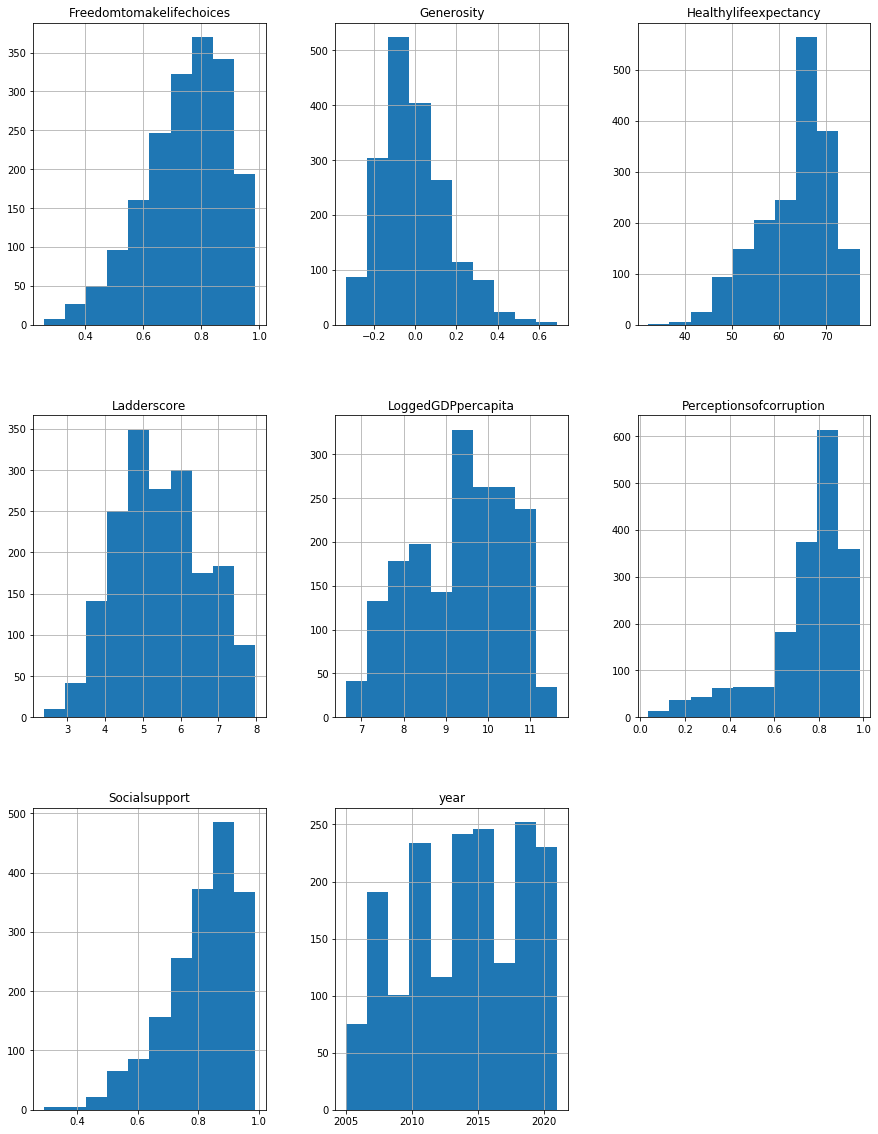

<IPython.core.display.Javascript object>

In [126]:
df_all_dropped.hist(figsize=(15, 20))
# Looks like Generosity, is right skewed, Ladderscore and LoggedGDP is normal distributed and the rest is left skewed

### Answering our questions

#### 1. Which country and which continent is the happiest / least happy?

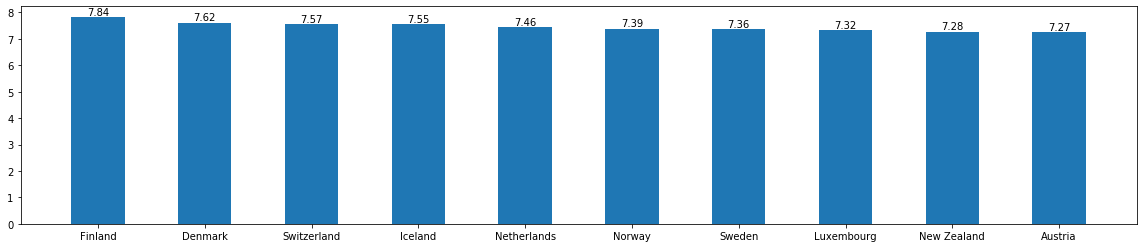

<IPython.core.display.Javascript object>

In [211]:
df_all_dropped[df_all_dropped.year == 2021].sort_values(
    "Ladderscore", ascending=False
)  # we are interested in the top 10, so we are ranking them first
x = df_all_dropped["Countryname"][:10]  # we only want the first 10 countries
y = df_all_dropped["Ladderscore"][:10].round(
    2
)  # and we want to round the Ladderscores to make them more readable
fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(x, y, width=0.5)
for (
    bar
) in (
    bars
):  # since the values are pretty close together we want to write them at the top of the bars
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f"{height}", ha="center", va="bottom")

So it looks like the happiest country in 2021 is Finland, follwed by Denmark and Switzerland. It is telling, that the scandinavian countries all rank pretty high - and that New Zealand is the only country not in Europe to make the top 10.

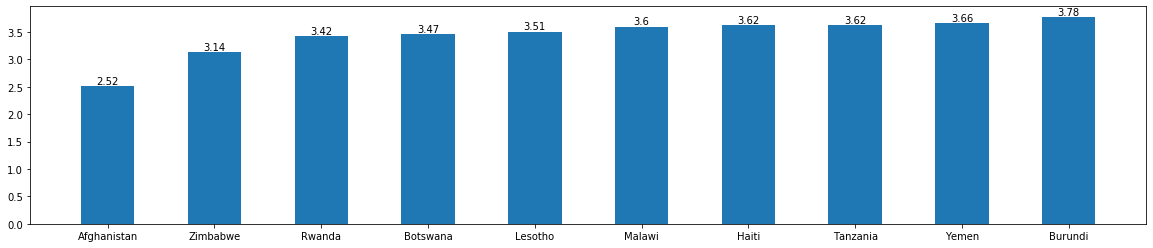

<IPython.core.display.Javascript object>

In [208]:
df_all_dropped_reverse = df_all_dropped[df_all_dropped.year == 2021].sort_values(
    "Ladderscore"
)
x = df_all_dropped_reverse["Countryname"][:10]
y = df_all_dropped_reverse["Ladderscore"][:10].round(2)
fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(x, y, width=0.5)
for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f"{height}", ha="center", va="bottom")

Afghanistan is the unhappiest country in 2021, by a considerable margin. The other countries are mainly in Africa.

In [212]:
df_grouped = (
    df_all_dropped[df_all_dropped.year == 2021].groupby("Regionalindicator").mean()
)  # Now we want to see, which continents are the happiest

<IPython.core.display.Javascript object>

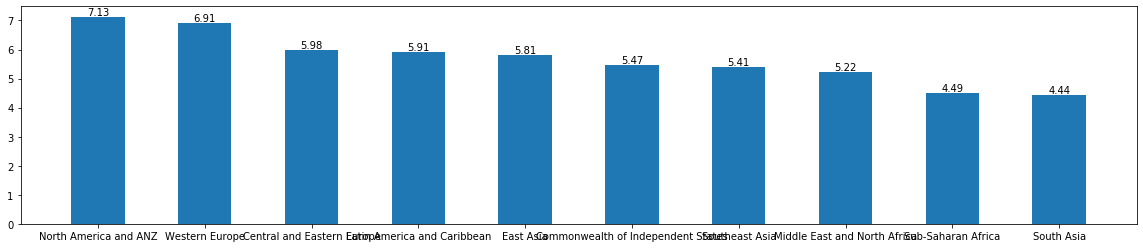

<IPython.core.display.Javascript object>

In [214]:
df_grouped = df_grouped.sort_values("Ladderscore", ascending=False).reset_index()
x = df_grouped["Regionalindicator"][:10]
y = df_grouped["Ladderscore"][:10].round(2)
fig, ax = plt.subplots(figsize=(20, 4))
bars = ax.bar(x, y, width=0.5)
for bar in bars:
    height = bar.get_height()
    label_x_pos = bar.get_x() + bar.get_width() / 2
    ax.text(label_x_pos, height, s=f"{height}", ha="center", va="bottom")

North America and ANZ is the happiest region - which might be surprising considering it only had one country in the top 10. But Western Europe seems to have too many lower ranking countries, that seem to weigh it down a bit. It is still pretty even and the margin to the next region (Central and Eastern Europe) is already considerable. South Asia and Sub-Saharan Africa are at the bottom of the list.

#### 2. Which countries have changed the most in the last 15 years?

In [293]:
# To check, which country has changed the most, we will compare their happiest year with the least happy year per country
result = df_all_dropped.groupby("Countryname")["Ladderscore"].agg(["max", "min"])
result["diff"] = result["max"] - result["min"]

<IPython.core.display.Javascript object>

In [295]:
# first we will look at the ten countries that changed the most
result.sort_values("diff", ascending=False).head(10).reset_index()

,Countryname,max,min,diff
0,Venezuela,7.478,4.041,3.437
1,Benin,5.820,3.193,2.627
2,Liberia,5.121,2.702,2.419
3,Afghanistan,4.758,2.375,2.383
4,Zimbabwe,4.955,2.694,2.261
5,El Salvador,6.839,4.741,2.098
6,Nicaragua,6.476,4.460,2.016
7,Botswana,5.451,3.461,1.990
8,Zambia,5.260,3.307,1.953
9,Greece,6.647,4.720,1.927


<IPython.core.display.Javascript object>

So Venezuela has changed the most and by a considerable margin. Greece is the only european country to make the list.

In [296]:
dfchanged = (
    result.sort_values("diff", ascending=False).head(5).reset_index()
)  # plotting 10 countries in the same chart would be messy, so we will only look at the top 5

<IPython.core.display.Javascript object>

In [285]:
Countries = dfchanged.Countryname.tolist()

<IPython.core.display.Javascript object>

In [286]:
data = df_all_dropped[df_all_dropped.Countryname.isin(Countries)].sort_values("year")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [291]:
fig = px.line(
    data, x="year", y="Ladderscore", title="Change in Happyness", color="Countryname",
)

<IPython.core.display.Javascript object>

In [292]:
fig.show()

<IPython.core.display.Javascript object>

Venezuela was one of the happiest countries in 2010, but the country plummeted to just over 4 in 2016. Benin and Liberia both seem to show an upwards trend.

#### 3: Which factors have the most impact for the happiness of a country?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1448de1d0>,
      dtype=object)

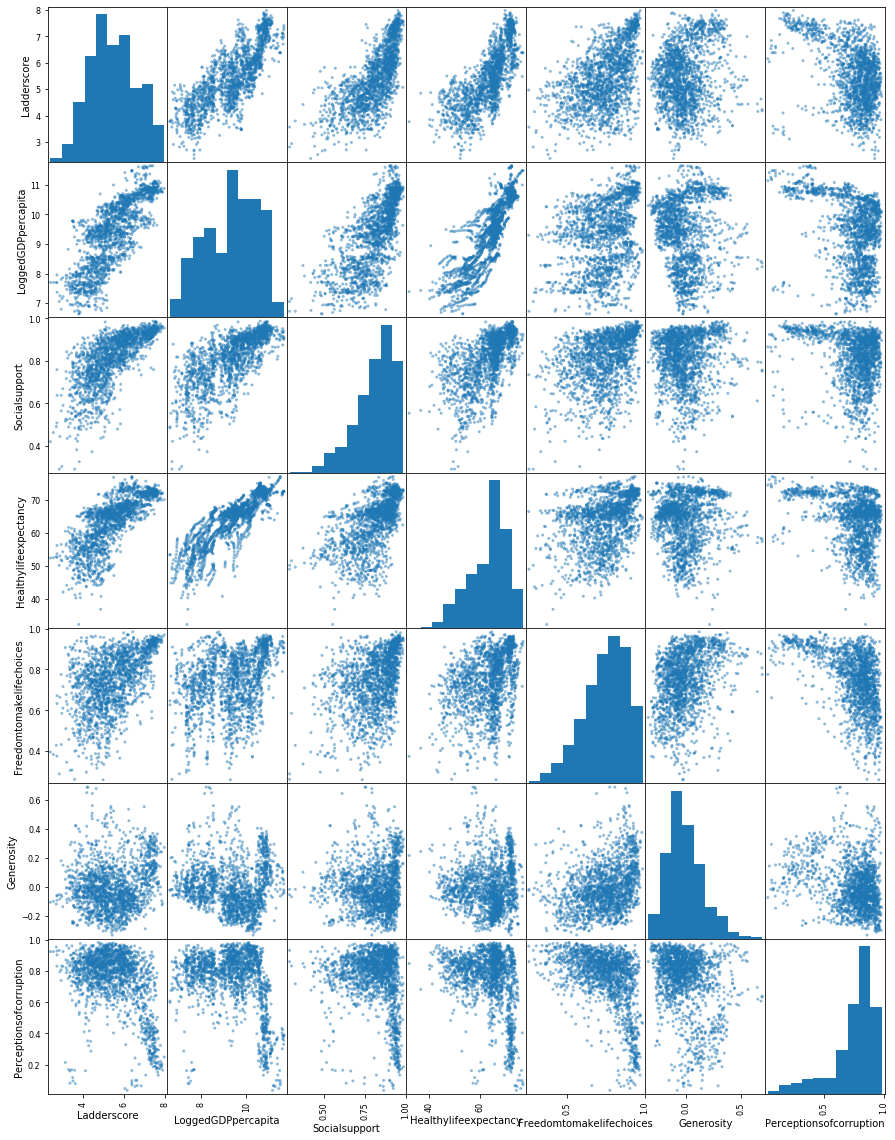

<IPython.core.display.Javascript object>

In [297]:
# To determine, which factores have the most impact for the happiness of a country, we will first take a look
# at which variable has the highest or lowest correlation to Ladderscore:

attributes = [
    "Ladderscore",
    "LoggedGDPpercapita",
    "Socialsupport",
    "Healthylifeexpectancy",
    "Freedomtomakelifechoices",
    "Generosity",
    "Perceptionsofcorruption",
]
scatter_matrix(df_all_dropped[attributes], figsize=(15, 20))

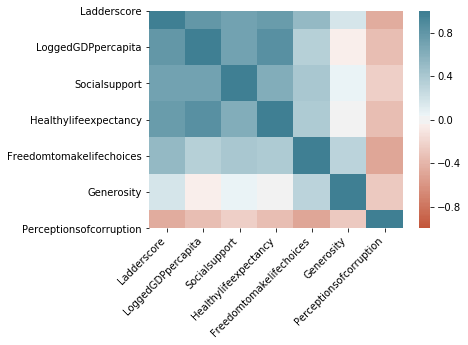

<IPython.core.display.Javascript object>

In [305]:
corr = df_all_dropped[attributes].corr()
ax = sns.heatmap(
    corr,
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

In [130]:
df_all_dropped[df_all_dropped.columns[1:]].corr()["Ladderscore"][:]

Ladderscore                 1.000000
LoggedGDPpercapita          0.792914
Socialsupport               0.716602
Healthylifeexpectancy       0.754898
Freedomtomakelifechoices    0.519649
Generosity                  0.173692
Perceptionsofcorruption    -0.454897
year                        0.064143
Name: Ladderscore, dtype: float64

<IPython.core.display.Javascript object>

Looking at this, Generosity seems to be least correlated and perception of corruption the only
variable negatively correlated. LoggedGDPpercapita has the highest correlation, followed by Healthy life expectancy. But correlation alone doesn't always tell the whole story, so we will try a linear model to show, which variable has the highest contribution to happiness.

In [298]:
# we only select the numeric features. I was thinking about including the region as a categorical variable but felt,
# like it would take too much away from the other variables. And the region is something you can't change, these
# variables you could change:
features = df_all_dropped[
    [
        "LoggedGDPpercapita",
        "Socialsupport",
        "Healthylifeexpectancy",
        "Freedomtomakelifechoices",
        "Generosity",
        "Perceptionsofcorruption",
    ]
]

<IPython.core.display.Javascript object>

In [152]:
features

,LoggedGDPpercapita,Socialsupport,Healthylifeexpectancy,Freedomtomakelifechoices,Generosity,Perceptionsofcorruption
0,10.775,0.954,72.0,0.949,-0.098,0.186
1,10.933,0.954,72.7,0.946,0.030,0.179
2,11.117,0.942,74.4,0.919,0.025,0.292
3,10.878,0.983,73.0,0.955,0.160,0.673
4,10.932,0.942,72.4,0.913,0.175,0.338
...,...,...,...,...,...,...
2093,7.984,0.768,54.4,0.733,-0.095,0.724
2094,8.016,0.754,55.0,0.753,-0.098,0.751
2095,8.049,0.775,55.6,0.763,-0.068,0.844
2096,7.950,0.759,56.2,0.632,-0.064,0.831


<IPython.core.display.Javascript object>

In [299]:
# We want to scale our features, so that we can better compare the contribution of each variable.
scaler = MinMaxScaler(feature_range=(0, 1))

<IPython.core.display.Javascript object>

In [300]:
X = features
rescaledX = scaler.fit_transform(X)
Y = df_all_dropped.Ladderscore.values.reshape(-1, 1)
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(rescaledX, Y)  # perform linear regression
Y_pred = linear_regressor.predict(rescaledX)  # make predictions

<IPython.core.display.Javascript object>

In [301]:
linear_regressor.score(rescaledX, Y) #with these features we get a R2 of 0.75 which is good, not great. But definetly usable.

0.7522425189475989

<IPython.core.display.Javascript object>

In [304]:
coefs = pd.DataFrame(
    linear_regressor.coef_.reshape(-1, 1), columns=["Coefficients"], index=X.columns
)  # we want to know the Coefficients to be able to see, which feature contributed the most to the Ladderscore.

<IPython.core.display.Javascript object>

In [308]:
coefs

,Coefficients
LoggedGDPpercapita,1.786844
Socialsupport,1.625653
Healthylifeexpectancy,1.352484
Freedomtomakelifechoices,0.731575
Generosity,0.734588
Perceptionsofcorruption,-0.647017


<IPython.core.display.Javascript object>

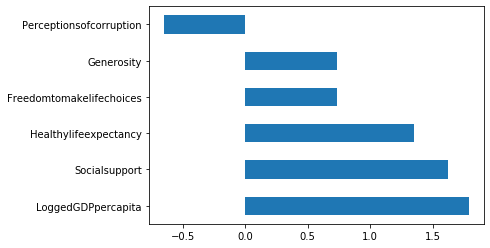

<IPython.core.display.Javascript object>

In [316]:
coefs.Coefficients.plot.barh()

In [313]:
plt.bar(coefs.Coefficients)

plt.show()

TypeError: bar() missing 1 required positional argument: 'height'

<IPython.core.display.Javascript object>

In [ ]:
coefs.plot(type="bar")

So Logged GPD per capita contributed the most to Happyness, followed by Social support. Perceptions of corruption did contribute negatively but not much. Freedom to make life choices actually contributed less than Generosity by a very small margin. This is one of the differences to our correlation matrix - Social dupport contributing moire than Healthy Life Expectancy is the other. Overall, based on these insights, I would rate the factors like this:

##### Most important factor:
Logged GdP per capita - the prosperity of a nation is (not surprisingly) the biggest factor in how happy it is

##### Very important factors:
Social Support
Healthy Life expectancy

Both of those seem to play a big role in the happyness of a country.

##### Less important factors:
Freedom to make life choices
Generosity
Perceptions of corruption

These 3 factors definetly play a role in the happyness of a country - but they are less important than the other three. And it would be reasonable to think, that these three factores improve, if the other three factors also improve.